In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab

%matplotlib inline

# Rat sightings in NYC 

I got my data set from NYC Open Data. It lists all 311 Service Requests from 2010 to present. The information is automatically updated daily. 

I want to know which NYC boroughs have the most complaints, what type of location is the most common and if the number of complaints is increasing over the years.



In [3]:
df = pd.read_csv("Rat_Sightings.csv", low_memory=False)
df.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Vehicle Type,Taxi Company Borough,Taxi Pick Up Location,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Latitude,Longitude,Location
0,15633054,01/01/2010 11:20:45 AM,NaN,DOHMH,Department of Health and Mental Hygiene,Rodent,Rat Sighting,1-2 Family Dwelling,11365.0,59-13 159 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.739983,-73.809299,"(40.73998332248969, -73.80929891501533)"
1,15633304,01/02/2010 12:50:36 AM,NaN,DOHMH,Department of Health and Mental Hygiene,Rodent,Rat Sighting,Commercial Building,10016.0,2 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.743161,-73.976983,"(40.74316088098852, -73.97698314758436)"
2,15633594,01/01/2010 03:05:37 PM,NaN,DOHMH,Department of Health and Mental Hygiene,Rodent,Rat Sighting,3+ Family Apt. Building,11377.0,31-14 58 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.756987,-73.903618,"(40.756986581184535, -73.90361811283164)"
3,15633599,01/01/2010 08:52:19 PM,NaN,DOHMH,Department of Health and Mental Hygiene,Rodent,Rat Sighting,Other (Explain Below),11201.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.688903,-73.980929,"(40.68890317557533, -73.98092864957985)"
4,15633605,01/01/2010 04:14:27 PM,NaN,DOHMH,Department of Health and Mental Hygiene,Rodent,Rat Sighting,3+ Family Apt. Building,10467.0,2504 BRONX PARK EAST,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.863614,-73.870441,"(40.8636140600279, -73.87044117516707)"


In [4]:
df.dtypes

Unique Key                          int64
Created Date                       object
Closed Date                        object
Agency                             object
Agency Name                        object
Complaint Type                     object
Descriptor                         object
Location Type                      object
Incident Zip                      float64
Incident Address                   object
Street Name                        object
Cross Street 1                     object
Cross Street 2                     object
Intersection Street 1              object
Intersection Street 2              object
Address Type                       object
City                               object
Landmark                           object
Facility Type                     float64
Status                             object
Due Date                           object
Resolution Action Updated Date     object
Community Board                    object
Borough                           

In [5]:
df['City'].value_counts()

BROOKLYN            39982
NEW YORK            30100
BRONX               23309
STATEN ISLAND        5484
Jamaica              1457
JAMAICA              1029
Ridgewood             967
RIDGEWOOD             824
Astoria               730
Woodside              540
Flushing              452
ASTORIA               451
WOODSIDE              399
Corona                357
Elmhurst              350
Long Island City      349
Ozone Park            343
Jackson Heights       333
Saint Albans          316
LONG ISLAND CITY      301
FLUSHING              266
Maspeth               252
ELMHURST              241
Middle Village        238
Queens Village        229
CORONA                226
Rego Park             226
SAINT ALBANS          220
MASPETH               218
East Elmhurst         215
                    ...  
CAMBRIA HEIGHTS        47
Little Neck            45
OAKLAND GARDENS        42
COLLEGE POINT          38
ARVERNE                34
Floral Park            27
Oakland Gardens        25
ROCKAWAY PAR

# Where are all these rats?

**Which boroughs have the biggest number of complaints?**

In [6]:
df.Borough.value_counts()

BROOKLYN         40114
MANHATTAN        30261
BRONX            23356
QUEENS           16899
STATEN ISLAND     5511
Unspecified          8
Name: Borough, dtype: int64

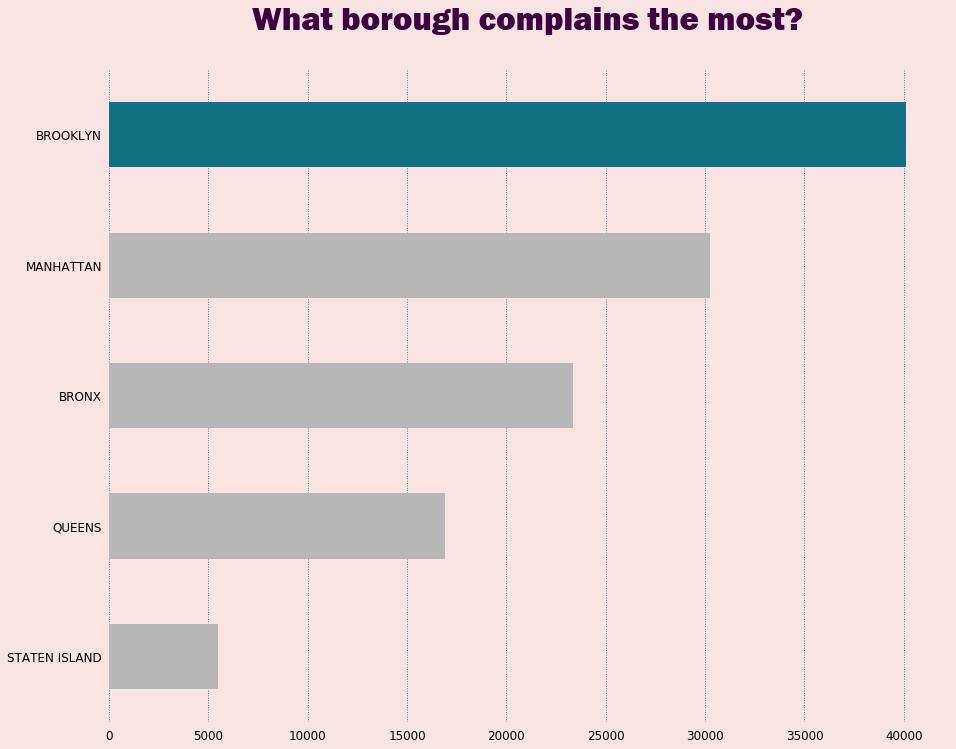

In [179]:
colors = ['#b7b7b7', '#b7b7b7', '#b7b7b7', '#b7b7b7', '#137083']

ax = df.Borough.value_counts().sort_values(ascending=True).tail(5).plot(kind='barh', color=colors, figsize=(15,12))

ax.set_title('What borough complains the most?', pad=40)
ax.title.set_fontsize(15)

ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.title.set_fontsize(33)
ax.title.set_fontname('Franklin Gothic Heavy')

ax.tick_params(which='both', left=False, bottom=False, grid_alpha=0.9)
ax.grid(True, axis='x', color='#137083', linestyle=':', linewidth=0.9)

ax.set_axisbelow(True)

plt.rcParams.update({
    'pdf.fonttype': 42,
    'ps.fonttype': 42,
    'figure.facecolor': '#fae3e3', # colors the outside
    'axes.facecolor': '#fae3e3', # colors the inside 
    'font.size': 12,
    'text.color': '#3d0240' 
})

plt.savefig('rats-borough.pdf')

In [7]:
df['Community Board'].value_counts()

Unspecified BROOKLYN         9148
Unspecified MANHATTAN        7630
03 BROOKLYN                  4785
Unspecified BRONX            4296
07 MANHATTAN                 3684
04 BROOKLYN                  3149
Unspecified QUEENS           3111
10 MANHATTAN                 2874
12 MANHATTAN                 2820
08 BROOKLYN                  2743
01 BROOKLYN                  2699
04 BRONX                     2555
03 MANHATTAN                 2523
12 QUEENS                    2467
08 MANHATTAN                 2339
05 QUEENS                    2166
07 BRONX                     2110
09 BROOKLYN                  2080
05 BRONX                     2072
01 STATEN ISLAND             2039
05 BROOKLYN                  2007
06 BROOKLYN                  1983
09 MANHATTAN                 1970
02 BROOKLYN                  1922
17 BROOKLYN                  1858
12 BRONX                     1727
06 BRONX                     1702
11 BRONX                     1672
11 MANHATTAN                 1599
09 BRONX      

Looks like people complain more in Brooklyn, followed by Manhattan. 
More specifically: 
- 03 Brooklyn: Bedford-Stuyvesant, Stuyvesant Heights, and Ocean Hill
- 07 Manhattan: Upper West Side
- 04 Brooklyn: Bushwick and Ridgewood
- 10 Manhattan: Central Harlem

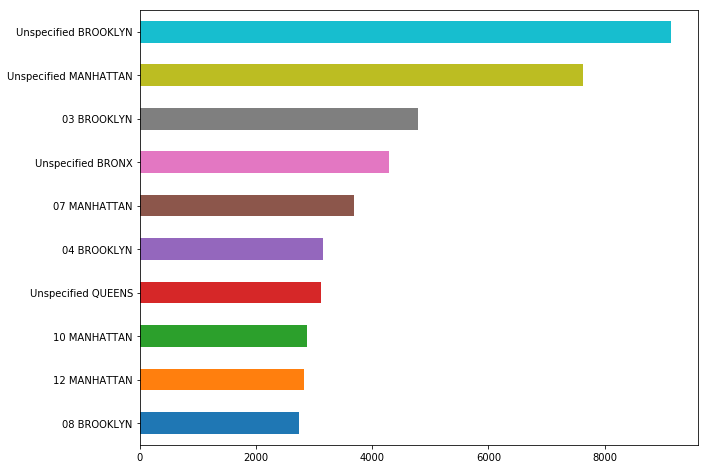

In [54]:
df['Community Board'].value_counts().head(10).sort_values(ascending=True).plot(kind='barh', figsize=(10,8))

**In what kind of location are these rats?**

In [56]:
df['Location Type'].value_counts()

3+ Family Apt. Building          47309
1-2 Family Dwelling              22254
Other (Explain Below)            17082
3+ Family Mixed Use Building      8933
Commercial Building               5857
Vacant Lot                        4002
Construction Site                 2663
Vacant Building                   2101
1-2 Family Mixed Use Building     1978
Catch Basin/Sewer                 1197
Parking Lot/Garage                1013
Public Garden                      584
Government Building                314
School/Pre-School                  200
Single Room Occupancy (SRO)        185
Day Care/Nursery                   142
Public Stairs                      132
Office Building                    100
Hospital                            90
Summer Camp                          7
Name: Location Type, dtype: int64

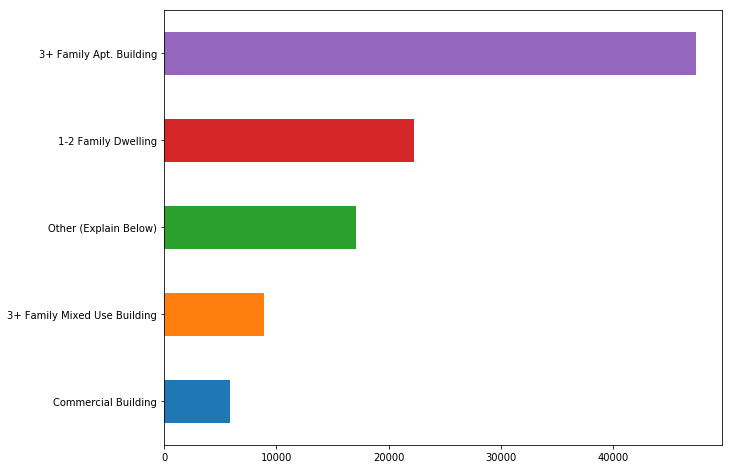

In [60]:
df['Location Type'].value_counts().head(5).sort_values(ascending=True).plot(kind='barh',figsize=(10,8))

In [78]:
df['Street Name'].value_counts()

EASTERN PARKWAY                  817
BROADWAY                         802
GRAND CONCOURSE                  779
LAFAYETTE AVENUE                 422
LEXINGTON AVENUE                 413
FULTON STREET                    407
GREENE AVENUE                    405
WALLACE AVENUE                   403
DEAN STREET                      390
BEDFORD AVENUE                   384
PUTNAM AVENUE                    383
JEFFERSON AVENUE                 373
MADISON STREET                   350
DEKALB AVENUE                    337
HANCOCK STREET                   331
AMSTERDAM AVENUE                 331
HALSEY STREET                    324
PACIFIC STREET                   320
UNION STREET                     320
MORRIS AVENUE                    315
BUSHWICK AVENUE                  314
ATLANTIC AVENUE                  311
PARK PLACE                       309
PROSPECT AVENUE                  308
WASHINGTON AVENUE                303
BERGEN STREET                    300
WALTON AVENUE                    297
B

EASTERN PARKWAY and BROADWAY are the street with the most complaints.

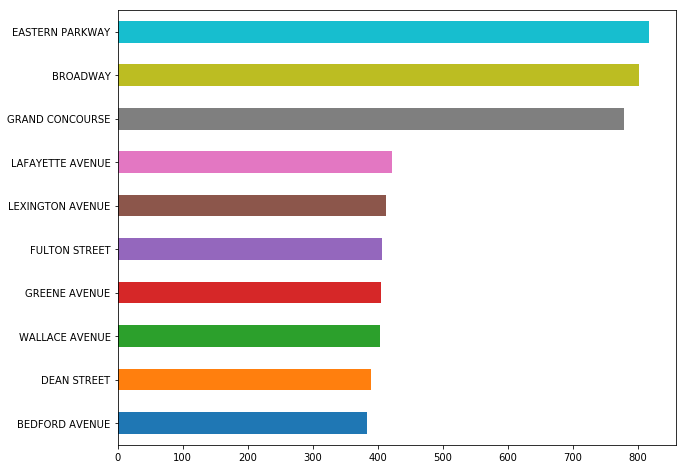

In [82]:
df['Street Name'].value_counts().head(10).sort_values(ascending=True).plot(kind='barh', figsize=(10,8))

# Are people complaining more?

**Is the number of complaints increasing?**

Let's create a column for year and find out. 

In [8]:
df['year'] = df['Created Date'].str.extract(r'([0-9][0-9][0-9][0-9])', expand=True)

In [9]:
df.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Taxi Company Borough,Taxi Pick Up Location,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Latitude,Longitude,Location,year
0,15633054,01/01/2010 11:20:45 AM,NaN,DOHMH,Department of Health and Mental Hygiene,Rodent,Rat Sighting,1-2 Family Dwelling,11365.0,59-13 159 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,40.739983,-73.809299,"(40.73998332248969, -73.80929891501533)",2010
1,15633304,01/02/2010 12:50:36 AM,NaN,DOHMH,Department of Health and Mental Hygiene,Rodent,Rat Sighting,Commercial Building,10016.0,2 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,40.743161,-73.976983,"(40.74316088098852, -73.97698314758436)",2010
2,15633594,01/01/2010 03:05:37 PM,NaN,DOHMH,Department of Health and Mental Hygiene,Rodent,Rat Sighting,3+ Family Apt. Building,11377.0,31-14 58 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,40.756987,-73.903618,"(40.756986581184535, -73.90361811283164)",2010
3,15633599,01/01/2010 08:52:19 PM,NaN,DOHMH,Department of Health and Mental Hygiene,Rodent,Rat Sighting,Other (Explain Below),11201.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,40.688903,-73.980929,"(40.68890317557533, -73.98092864957985)",2010
4,15633605,01/01/2010 04:14:27 PM,NaN,DOHMH,Department of Health and Mental Hygiene,Rodent,Rat Sighting,3+ Family Apt. Building,10467.0,2504 BRONX PARK EAST,...,NaN,NaN,NaN,NaN,NaN,NaN,40.863614,-73.870441,"(40.8636140600279, -73.87044117516707)",2010


In [10]:
df.year.value_counts()

2017    19152
2016    17230
2015    15272
2014    12617
2013    10739
2012    10643
2010    10534
2011    10454
2018     9508
Name: year, dtype: int64

Looks like the number of complaints is getting bigger and bigger over the years.

**Let's turn the date column into a datetime so we can plot it!**

In [11]:
#01/01/2010 11:20:45 AM

df['date'] = pd.to_datetime(df['Created Date'], format="%m/%d/%Y %I:%M:%S %p") 
df.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Taxi Pick Up Location,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Latitude,Longitude,Location,year,date
0,15633054,01/01/2010 11:20:45 AM,NaN,DOHMH,Department of Health and Mental Hygiene,Rodent,Rat Sighting,1-2 Family Dwelling,11365.0,59-13 159 STREET,...,NaN,NaN,NaN,NaN,NaN,40.739983,-73.809299,"(40.73998332248969, -73.80929891501533)",2010,2010-01-01 11:20:45
1,15633304,01/02/2010 12:50:36 AM,NaN,DOHMH,Department of Health and Mental Hygiene,Rodent,Rat Sighting,Commercial Building,10016.0,2 AVENUE,...,NaN,NaN,NaN,NaN,NaN,40.743161,-73.976983,"(40.74316088098852, -73.97698314758436)",2010,2010-01-02 00:50:36
2,15633594,01/01/2010 03:05:37 PM,NaN,DOHMH,Department of Health and Mental Hygiene,Rodent,Rat Sighting,3+ Family Apt. Building,11377.0,31-14 58 STREET,...,NaN,NaN,NaN,NaN,NaN,40.756987,-73.903618,"(40.756986581184535, -73.90361811283164)",2010,2010-01-01 15:05:37
3,15633599,01/01/2010 08:52:19 PM,NaN,DOHMH,Department of Health and Mental Hygiene,Rodent,Rat Sighting,Other (Explain Below),11201.0,NaN,...,NaN,NaN,NaN,NaN,NaN,40.688903,-73.980929,"(40.68890317557533, -73.98092864957985)",2010,2010-01-01 20:52:19
4,15633605,01/01/2010 04:14:27 PM,NaN,DOHMH,Department of Health and Mental Hygiene,Rodent,Rat Sighting,3+ Family Apt. Building,10467.0,2504 BRONX PARK EAST,...,NaN,NaN,NaN,NaN,NaN,40.863614,-73.870441,"(40.8636140600279, -73.87044117516707)",2010,2010-01-01 16:14:27


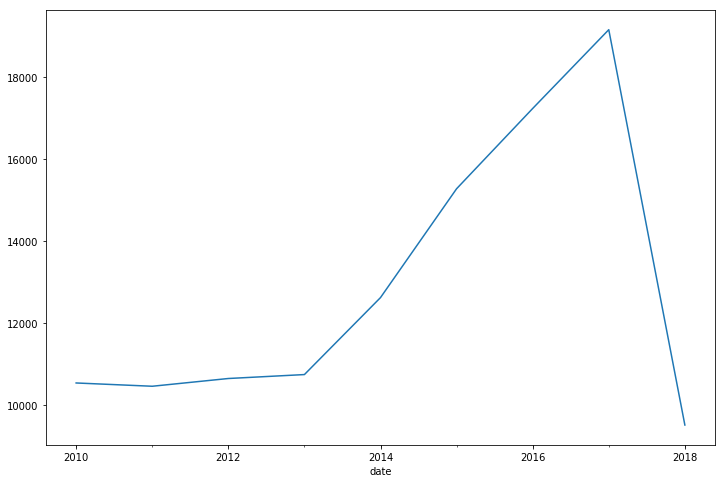

In [12]:
# By year 

df.resample('Y', on='date').count().date.plot(figsize=(12,8))

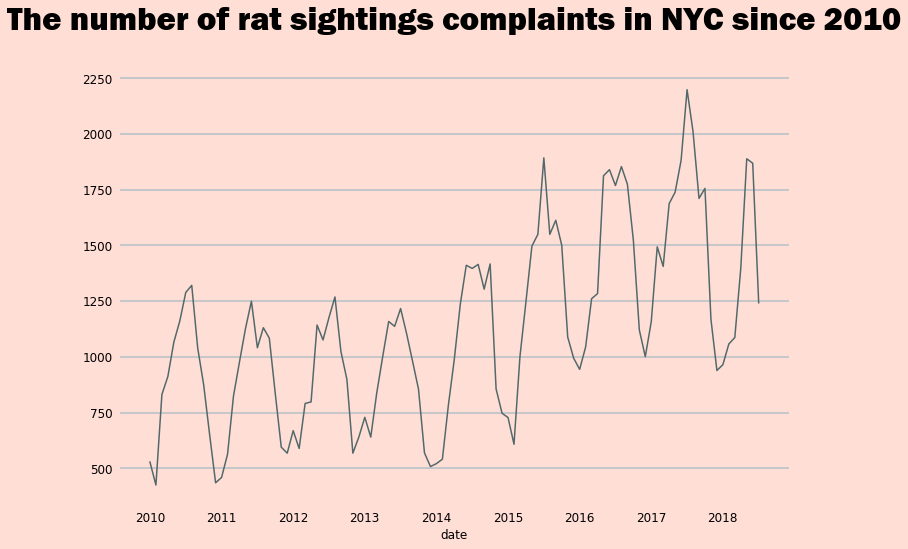

In [94]:
# By month 

ax = df.resample('M', on='date').count().date.plot(figsize=(12,8), color='#52686a')

ax.set_title('The number of rat sightings complaints in NYC since 2010', pad=40)
ax.title.set_fontsize(17)

ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.title.set_fontsize(33)
ax.title.set_fontname('Franklin Gothic Heavy')

ax.tick_params(which='both', left=False, bottom=False, grid_alpha=0.9)
ax.grid(True, axis='y', color='#acbdc5', linestyle='-', linewidth=1.5)

ax.set_axisbelow(True)

plt.rcParams.update({
    'pdf.fonttype': 42,
    'ps.fonttype': 42,
    'figure.facecolor': '#ffded5', # colors the outside
    'axes.facecolor': '#ffded5', # colors the inside 
    'font.size': 12
})

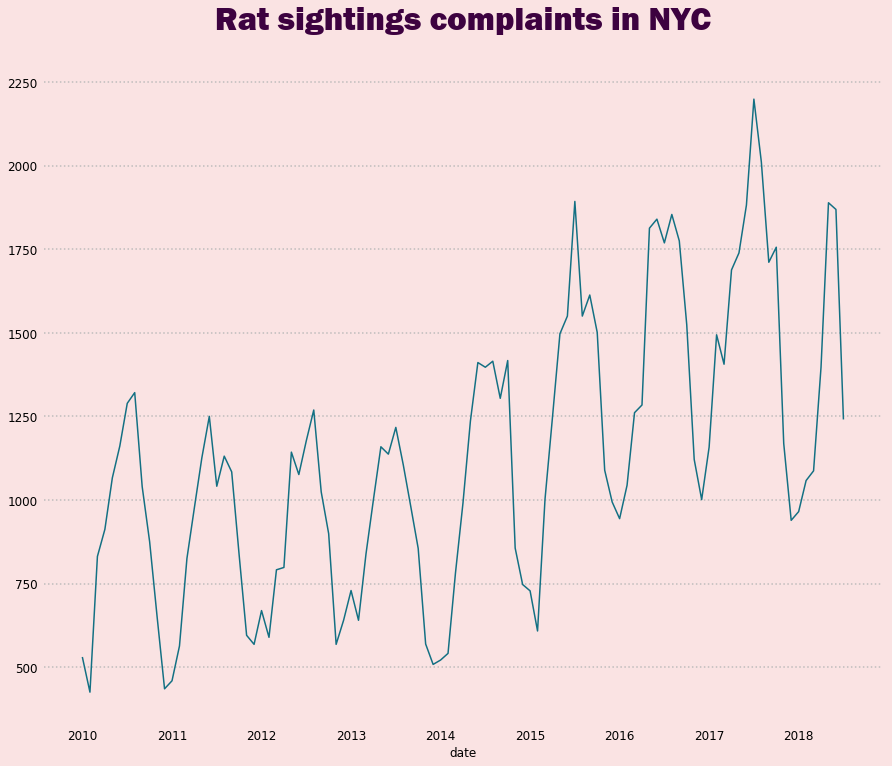

In [24]:
# By month 

ax = df.resample('M', on='date').count().date.plot(figsize=(15,12), color='#137083')

ax.set_title('Rat sightings complaints in NYC', pad=40)
ax.title.set_fontsize(17)

ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.title.set_fontsize(33)
ax.title.set_fontname('Franklin Gothic Heavy')

ax.tick_params(which='both', left=False, bottom=False, grid_alpha=0.9)
ax.grid(True, axis='y', color='#b7b7b7', linestyle=':', linewidth=1.5)

ax.set_axisbelow(True)

plt.rcParams.update({
    'pdf.fonttype': 42,
    'ps.fonttype': 42,
    'figure.facecolor': '#fae3e3', #colors the outside
    'axes.facecolor': '#fae3e3', # colors the inside 
    'font.size': 12,
    'text.color': '#3d0240' 
})

plt.savefig('rat-years2.pdf')

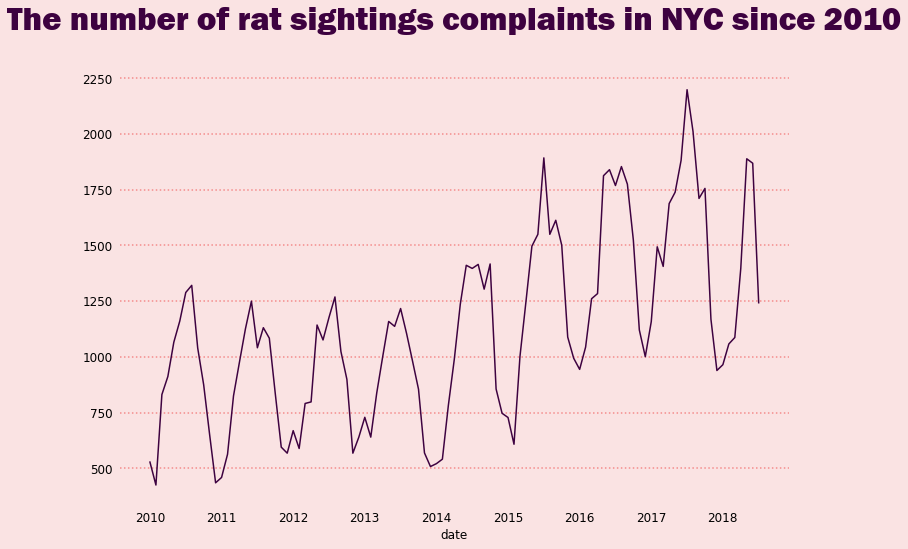

In [15]:
# By month 

ax = df.resample('M', on='date').count().date.plot(figsize=(12,8), color='#3d0240')

ax.set_title('The number of rat sightings complaints in NYC since 2010', pad=40)
ax.title.set_fontsize(17)

ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.title.set_fontsize(33)
ax.title.set_fontname('Franklin Gothic Heavy')

ax.tick_params(which='both', left=False, bottom=False, grid_alpha=0.9)
ax.grid(True, axis='y', color='#f38181', linestyle=':', linewidth=1.5)

ax.set_axisbelow(True)

plt.rcParams.update({
    'pdf.fonttype': 42,
    'ps.fonttype': 42,
    'figure.facecolor': '#fbfbfb', # colors the outside
    'axes.facecolor': '#fbfbfb', # colors the inside 
    'font.size': 12,
    'text.color': '#000000' 
})



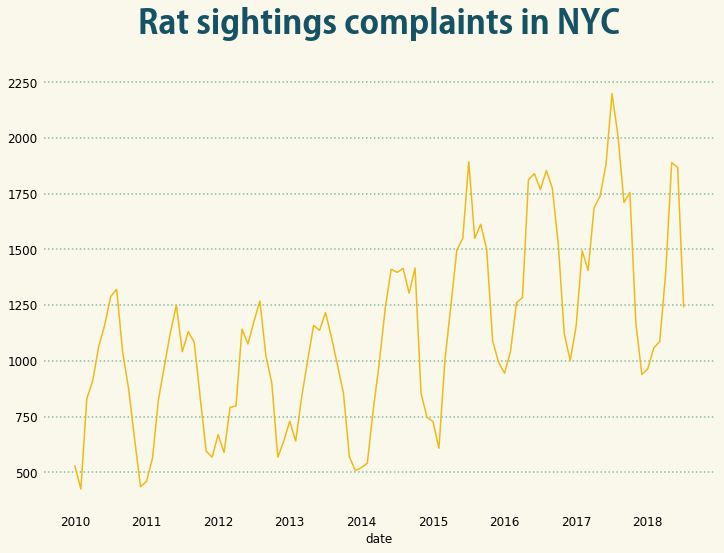

In [138]:
# By month 

ax = df.resample('M', on='date').count().date.plot(figsize=(12,8), color='#f0b917')

ax.set_title('Rat sightings complaints in NYC', pad=40)
ax.title.set_fontsize(17)

ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.title.set_fontsize(33)
ax.title.set_fontname('Adobe Gothic Std')

ax.tick_params(which='both', left=False, bottom=False, grid_alpha=0.9)
ax.grid(True, axis='y', color='#76b39d', linestyle=':', linewidth=1.5)

ax.set_axisbelow(True)

plt.rcParams.update({
    'pdf.fonttype': 42,
    'ps.fonttype': 42,
    'figure.facecolor': '#f9f8eb', # colors the outside
    'axes.facecolor': '#f9f8eb', # colors the inside 
    'font.size': 12,
    'text.color': '#155263' 
})

Interesting. Looks like people complaint more in the summer. Why?

Some of the reasons might be: 

- Extra hot summer lead to more rodent babies, experts say.
- Warmer weather means more people in parks leaving food waste for the rats, which breed during the summer.
- That’s when all the garbage is out
- Rats are known for being more aggressive in finding food and preparing themselves for winter during the summer season through the means of stockpiling and nesting.

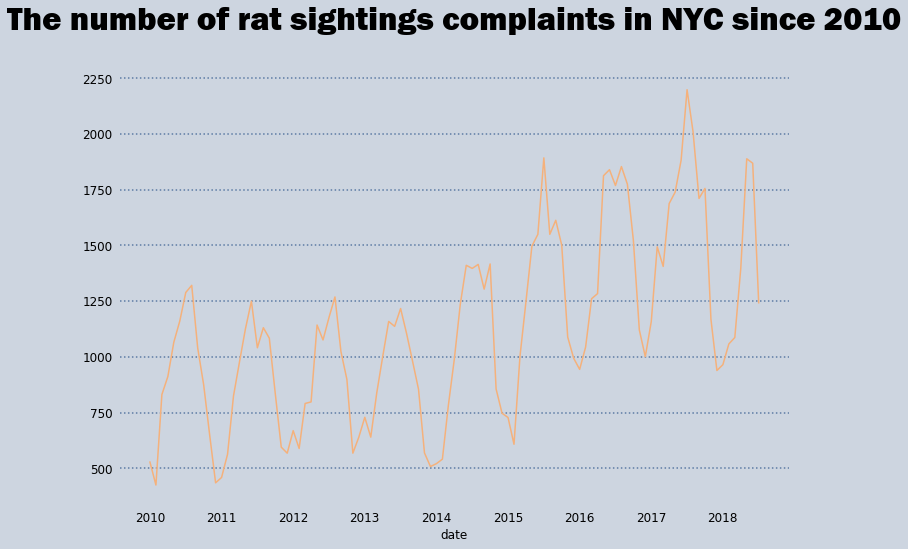

In [153]:
# By month 

ax = df.resample('M', on='date').count().date.plot(figsize=(12,8), color='#f5b17b')

ax.set_title('The number of rat sightings complaints in NYC since 2010', pad=40)
ax.title.set_fontsize(17)

ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.title.set_fontsize(33)
ax.title.set_fontname('Franklin Gothic Heavy')

ax.tick_params(which='both', left=False, bottom=False, grid_alpha=0.9)
ax.grid(True, axis='y', color='#4e709d', linestyle=':', linewidth=1.5)

ax.set_axisbelow(True)

plt.rcParams.update({
    'pdf.fonttype': 42,
    'ps.fonttype': 42,
    'figure.facecolor': '#cdd5e0', # colors the outside
    'axes.facecolor': '#cdd5e0', # colors the inside 
    'font.size': 12,
    'text.color': '#000000' 
})



In [17]:
from pywaffle import Waffle

In [18]:
df['Location Type'].value_counts()

3+ Family Apt. Building          47309
1-2 Family Dwelling              22254
Other (Explain Below)            17082
3+ Family Mixed Use Building      8933
Commercial Building               5857
Vacant Lot                        4002
Construction Site                 2663
Vacant Building                   2101
1-2 Family Mixed Use Building     1978
Catch Basin/Sewer                 1197
Parking Lot/Garage                1013
Public Garden                      584
Government Building                314
School/Pre-School                  200
Single Room Occupancy (SRO)        185
Day Care/Nursery                   142
Public Stairs                      132
Office Building                    100
Hospital                            90
Summer Camp                          7
Name: Location Type, dtype: int64

In [21]:
df_waffle = pd.DataFrame({
    'location_type': ['3+ Family Apt. Building', '1-2 Family Dwelling', 'Other', '3+ Family Mixed Use Building', 'Commercial Building','Vacant Lot', 'Construction Site', 'Vacant Building', '1-2 Family Mixed Use Building', 'Catch Basin/Sewer', 'Parking Lot/Garage', 'Public Garden', 'Government Building', 'School/Pre-School', 'Single Room Occupancy (SRO)', 'Day Care/Nursery', 'Public Stairs', 'Office Building', 'Hospital', 'Summer Camp' ],
    'number_of_complaints': [47309/100, 22254/100, 17082/100, 8933/100, 5857/100, 4002/100, 2663/100, 2101/100, 1978/100, 1197/100, 1013/100, 584/100, 314/100, 200/100, 185/100, 142/100, 132/100, 100/100, 90/100, 7/100]
})
df_waffle

,location_type,number_of_complaints
0,3+ Family Apt. Building,473.09
1,1-2 Family Dwelling,222.54
2,Other,170.82
3,3+ Family Mixed Use Building,89.33
4,Commercial Building,58.57
5,Vacant Lot,40.02
6,Construction Site,26.63
7,Vacant Building,21.01
8,1-2 Family Mixed Use Building,19.78
9,Catch Basin/Sewer,11.97


In [184]:
df_waffle.number_of_complaints.sum()

116143

c:\users\júlia ledur\appdata\local\programs\python\python36-32\lib\site-packages\matplotlib\figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


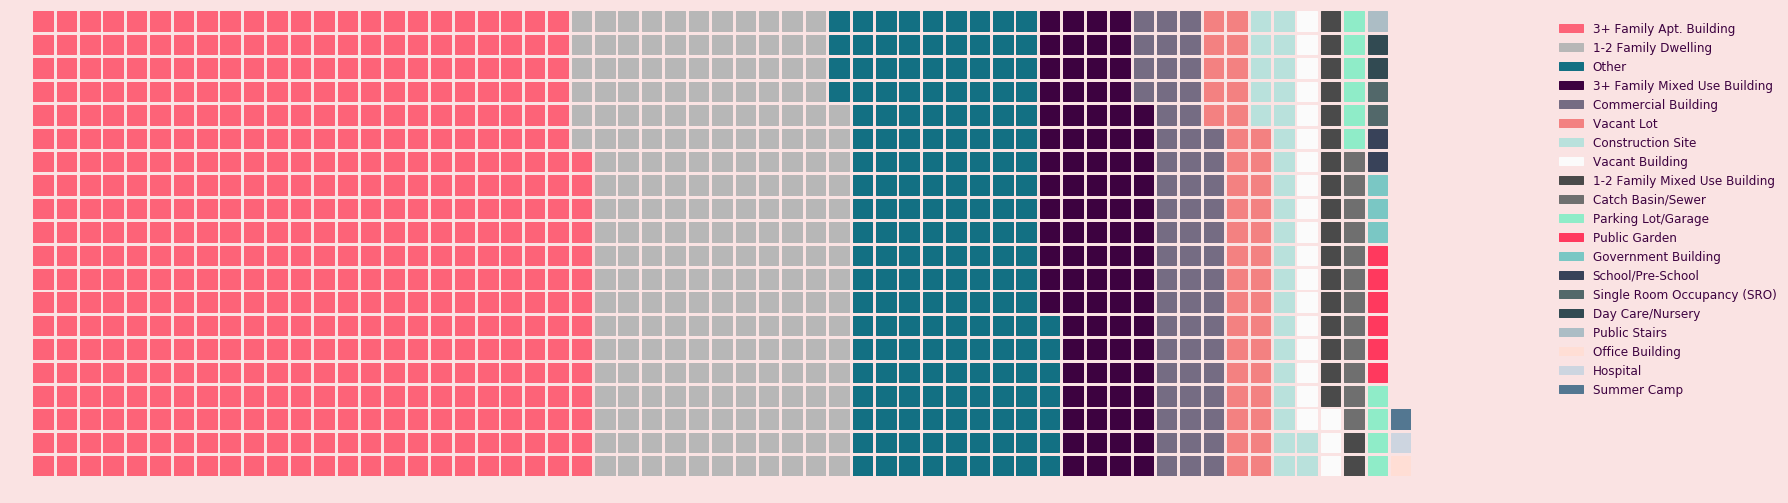

In [31]:
fig = plt.figure(
    FigureClass=Waffle, 
    rows=20,
    values=df_waffle.number_of_complaints,
    labels=list(df_waffle.location_type),
    figsize=(25, 25),
    colors=("#fd6378", "#b7b7b7", "#137083", "#3d0240", "#756c83", "#f38181", "#b9e1dc", "#fbfbfb", "#4a4a4a", "#6f6f6f", "#8fecc8", "#ff395e", "#7ac7c4", "#384259", "#52686a", "#314a52", "#acbdc5", "#ffded5", "#cdd5e0", "#537791"),
    legend={'loc': 'upper left', 'bbox_to_anchor': (1.1, 1), 'framealpha': 0}
)

fig.gca().set_facecolor('#fae3e3')
fig.set_facecolor('#fae3e3')

plt.savefig("rats-location-type.pdf")